In [305]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Read Train data 

In [233]:
X_train = pd.read_csv("~/Desktop/NEU/USML/Project/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace = True)

In [234]:
file = open("features.txt", "r")
features = []
for line in file:
    features.append(line.split()[1])

In [235]:
X_train.columns = features

X_train['subject'] = pd.read_csv("~/Desktop/NEU/USML/Project/UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt")

X_train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.278419          -0.016411          -0.123520         -0.998245   
1           0.279653          -0.019467          -0.113462         -0.995380   
2           0.279174          -0.026201          -0.123283         -0.996091   
3           0.276629          -0.016570          -0.115362         -0.998139   
4           0.277199          -0.010098          -0.105137         -0.997335   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.975300         -0.960322         -0.998807         -0.974914   
1         -0.967187         -0.978944         -0.996520         -0.963668   
2         -0.983403         -0.990675         -0.997099         -0.982750   
3         -0.980817         -0.990482         -0.998321         -0.979672   
4         -0.990487         -0.995420         -0.997627         -0.990218   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.957686         -0.943068  ...                        -0.595051   
1         -0.977469         -0.938692  ...                        -0.390748   
2         -0.989302         -0.938692  ...                        -0.117290   
3         -0.990441         -0.942469  ...                        -0.351471   
4         -0.995549         -0.942469  ...                        -0.545410   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.861499                     0.053477   
1                        -0.760104                    -0.118559   
2                        -0.482845                    -0.036788   
3                        -0.699205                     0.123320   
4                        -0.844619                     0.082632   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                             -0.007435                         -0.732626   
1                              0.177899                          0.100699   
2                             -0.012892                          0.640011   
3                              0.122542                          0.693578   
4                             -0.143439                          0.275041   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                              0.703511             -0.844788   
1                              0.808529             -0.848933   
2                             -0.485366             -0.848649   
3                             -0.615971             -0.847865   
4                             -0.368224             -0.849632   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  
0              0.180289             -0.054317        1  
1              0.180637             -0.049118        1  
2              0.181935             -0.047663        1  
3              0.185151             -0.043892        1  
4              0.184823             -0.042126        1  

[5 rows x 562 columns]

In [236]:
y_train = pd.read_csv("~/Desktop/NEU/USML/Project/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", names = ['labels'])
y_train.head()

labels
0       5
1       5
2       5
3       5
4       5

### Read Test data

In [237]:
X_test = pd.read_csv("~/Desktop/NEU/USML/Project/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", delim_whitespace = True)

X_test.columns = features

X_test['subject'] = pd.read_csv("~/Desktop/NEU/USML/Project/UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt")

X_test.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.286027          -0.013163          -0.119083         -0.975415   
1           0.275485          -0.026050          -0.118152         -0.993819   
2           0.270298          -0.032614          -0.117520         -0.994743   
3           0.274833          -0.027848          -0.129527         -0.993852   
4           0.279220          -0.018620          -0.113902         -0.994455   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.967458         -0.944958         -0.986799         -0.968401   
1         -0.969926         -0.962748         -0.994403         -0.970735   
2         -0.973268         -0.967091         -0.995274         -0.974471   
3         -0.967445         -0.978295         -0.994111         -0.965953   
4         -0.970417         -0.965316         -0.994585         -0.969481   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.945823         -0.894088  ...                        -0.121845   
1         -0.963483         -0.939260  ...                        -0.190422   
2         -0.968897         -0.938610  ...                        -0.344418   
3         -0.977346         -0.938610  ...                        -0.534685   
4         -0.965897         -0.937856  ...                        -0.493517   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.594944                    -0.083495   
1                        -0.640736                    -0.034956   
2                        -0.736124                    -0.017067   
3                        -0.846595                    -0.002223   
4                        -0.857565                    -0.095681   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.017500                         -0.434375   
1                              0.202302                          0.064103   
2                              0.154438                          0.340134   
3                             -0.040046                          0.736715   
4                              0.048849                          0.760684   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                              0.920593             -0.698091   
1                              0.145068             -0.702771   
2                              0.296407             -0.698954   
3                             -0.118545             -0.692245   
4                             -0.072216             -0.689816   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  
0              0.281343             -0.083898        2  
1              0.280083             -0.079346        2  
2              0.284114             -0.077108        2  
3              0.290722             -0.073857        2  
4              0.294896             -0.068471        2  

[5 rows x 562 columns]

In [238]:
y_test = pd.read_csv("~/Desktop/NEU/USML/Project/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", names = ['labels'])
y_test.head()

labels
0       5
1       5
2       5
3       5
4       5

### Data Preprocessing

In [239]:
# Check for null values in train and test
print("Return True if Null values present else False")
print("Null values in X_train:",X_train.isnull().values.any())
print("Null values in y_train:",y_train.isnull().values.any())
print("Total # of null values in train Dataset:",X_train.isnull().sum().sum())
print()
print("Null values in X_test:",X_train.isnull().values.any())
print("Null values in y_test:",y_test.isnull().values.any())
print("Total # of null values in test Dataset:",X_test.isnull().sum().sum())

Return True if Null values present else False
Null values in X_train: False
Null values in y_train: False
Total # of null values in train Dataset: 0

Null values in X_test: False
Null values in y_test: False
Total # of null values in test Dataset: 0


In [240]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7351, 562)
(7352, 1)
(2946, 562)
(2947, 1)


In [241]:
y_train = y_train.drop(labels = 346, axis = 0)
y_test = y_test.drop(labels = 301, axis = 0)

In [242]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7351, 562)
(7351, 1)
(2946, 562)
(2946, 1)


In [243]:
y_train = pd.DataFrame(pd.DataFrame(y_train).reset_index().drop(['index'], axis = 1))
y_test = pd.DataFrame(pd.DataFrame(y_test).reset_index().drop(['index'], axis = 1))

### Feature Scaling

1. Standard Scaling

In [244]:
# StandardScaler()

scale = StandardScaler()
X_train_scl= scale.fit_transform(X_train)
X_test_scl = scale.fit_transform(X_test)
X_train_scl

array([[ 0.05597152,  0.03147488, -0.25395122, ...,  0.40914928,
         0.00787361, -1.82939192],
       [ 0.07353784, -0.0434222 , -0.07634749, ...,  0.41032053,
         0.0264995 , -1.82939192],
       [ 0.06671871, -0.2084162 , -0.24975554, ...,  0.41468205,
         0.03171096, -1.82939192],
       ...,
       [-0.01563933,  0.01677161,  1.13210055, ...,  0.64061601,
         0.34868454,  1.40248984],
       [ 0.21587968, -0.02812928, -0.86771834, ...,  0.63149727,
         0.29325466,  1.40248984],
       [ 1.09615731,  0.12918132, -1.67264417, ...,  0.63276221,
         0.33393707,  1.40248984]])

In [245]:
# MinMaxScaler()

minmax_scale = MinMaxScaler()
X_train_mm= minmax_scale.fit_transform(X_train)
X_test_mm = minmax_scale.fit_transform(X_test)
X_train_mm

array([[0.63920942, 0.49179472, 0.4382399 , ..., 0.79848665, 0.47284164,
        0.        ],
       [0.63982653, 0.49026642, 0.44326915, ..., 0.79872236, 0.47544109,
        0.        ],
       [0.63958697, 0.48689968, 0.43835872, ..., 0.79960011, 0.47616841,
        0.        ],
       ...,
       [0.63669369, 0.49149469, 0.47748909, ..., 0.84506893, 0.52040559,
        1.        ],
       [0.64482708, 0.49057848, 0.42085971, ..., 0.84323381, 0.51266974,
        1.        ],
       [0.67575173, 0.49378844, 0.39806642, ..., 0.84348837, 0.51834742,
        1.        ]])

### Dimensionality Reduction

#### Principal Component Analysis

- Applying PCA on the original and scaled data to extract 95% of variance

In [246]:
pca = PCA(n_components = 0.95)

# Training Datasets

#PCA on Original data
X_train_pca = pca.fit_transform(X_train)

#PCA on standard scaled data
X_train_scl_pca = pca.fit_transform(X_train_scl)

#PCA on minmax scaled data
X_train_mm_pca = pca.fit_transform(X_train_mm)

# Test Datasets

#PCA on Original data
X_test_pca = pca.fit_transform(X_test)

#PCA on standard scaled data
X_test_scl_pca = pca.fit_transform(X_test_scl)

#PCA on minmax scaled data
X_test_mm_pca = pca.fit_transform(X_test_mm)

print("X_train:", X_train.shape)
print("PCA reduced X_train:", X_train_pca.shape)
print("Scaled X_train:", X_train_scl.shape)
print("PCA reduced scaled X_train:", X_train_scl_pca.shape)
print("Minmax Scaled X_train:", X_train_mm.shape)
print("PCA reduced Minmax scaled X_train:", X_train_mm_pca.shape)
print()
print("X_test:", X_test.shape)
print("PCA reduced X_test:", X_test_pca.shape)
print("Scaled X_test:", X_test_scl.shape)
print("PCA reduced scaled X_test:", X_test_scl_pca.shape)
print("Minmax Scaled X_test:", X_test_mm.shape)
print("PCA reduced Minmax scaled X_test:", X_test_mm_pca.shape)

X_train: (7351, 562)
PCA reduced X_train: (7351, 27)
Scaled X_train: (7351, 562)
PCA reduced scaled X_train: (7351, 102)
Minmax Scaled X_train: (7351, 562)
PCA reduced Minmax scaled X_train: (7351, 68)

X_test: (2946, 562)
PCA reduced X_test: (2946, 36)
Scaled X_test: (2946, 562)
PCA reduced scaled X_test: (2946, 99)
Minmax Scaled X_test: (2946, 562)
PCA reduced Minmax scaled X_test: (2946, 66)


#### T-Distributed Stocastic Neighbor Embedding

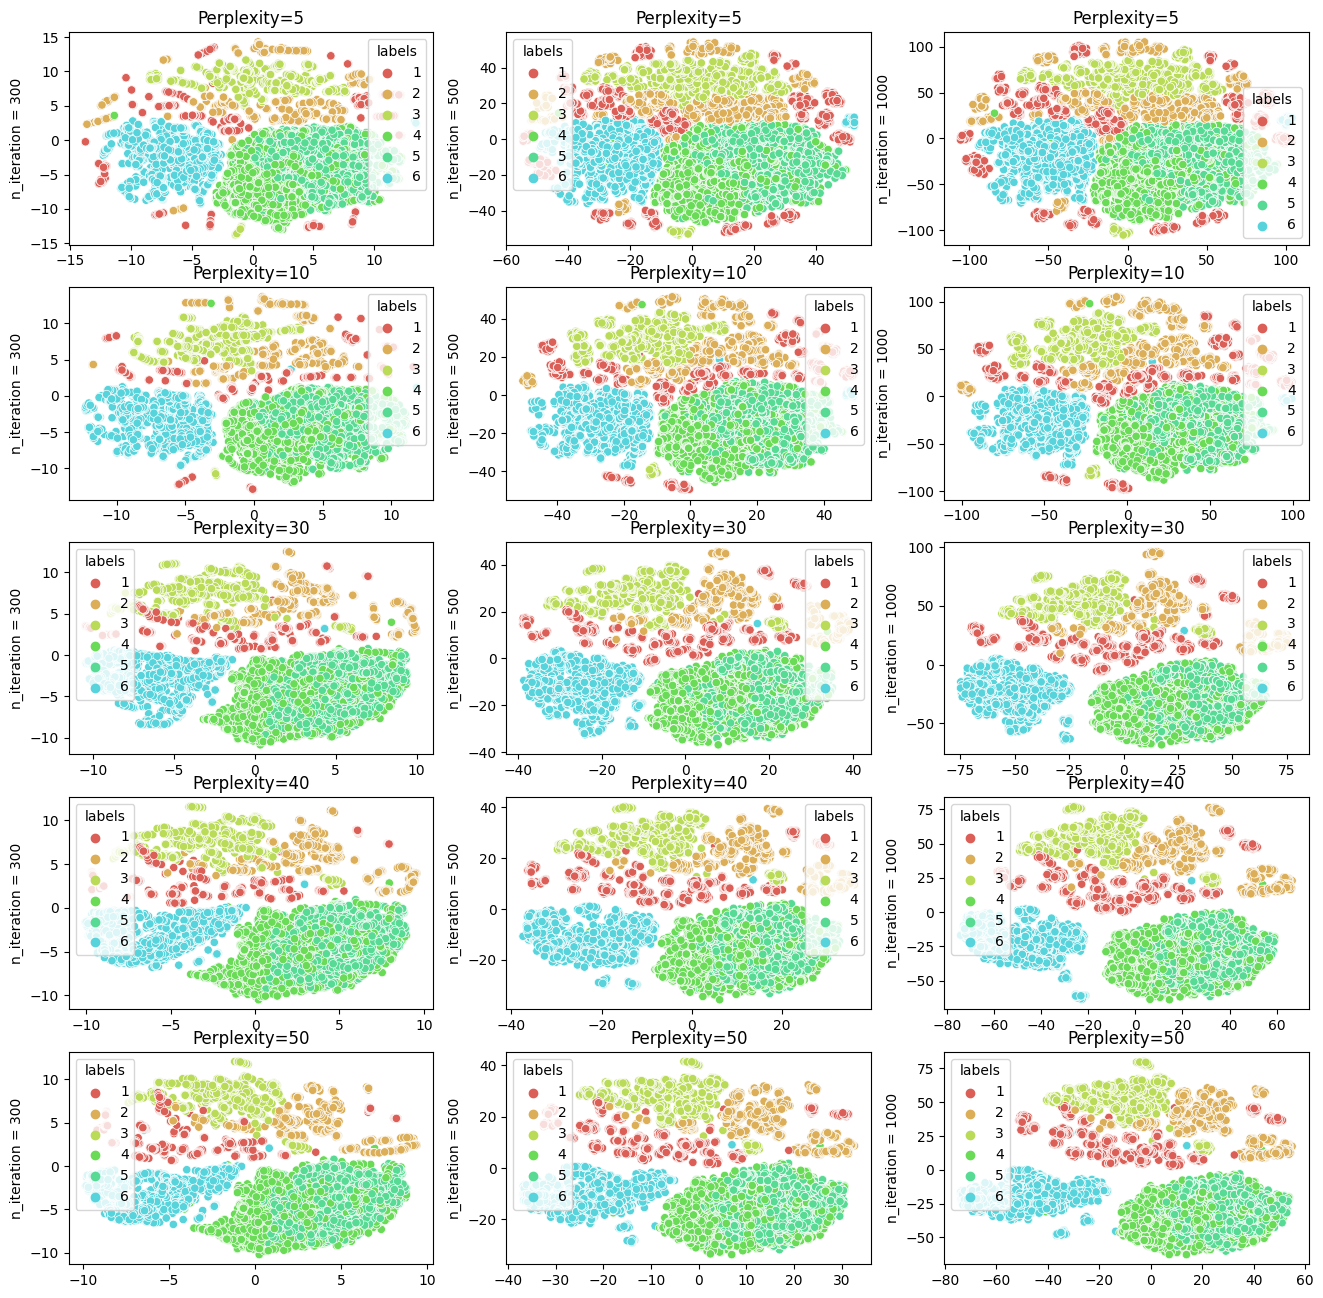

In [197]:
# Best perplexity and number of iterations
perplexity = [5,10,30,40,50]
n_iter = [300,500,1000]
(fig, subplots) = plt.subplots(5, 3, figsize=(16, 16))

for i,perp in enumerate(perplexity):
    for j, niter in enumerate(n_iter):
        ax = subplots[i][j]
        tsne = TSNE(n_components= 2,init="random",
                    random_state=0,perplexity= perp,
                    learning_rate="auto",n_iter= niter)
        y_pred = tsne.fit_transform(X_train_mm)
        ax.set_title("Perplexity=%d" % perp)
        ax.set(ylabel=f'n_iteration = {niter}')
        sns.scatterplot(ax = subplots[i,j], x = y_pred[:,0], y = y_pred[:,1], 
                        hue = y_train['labels'][list(pd.DataFrame(X_train_mm).index)], 
                        palette = sns.hls_palette(10), legend = 'full')
        ax.axis("tight")

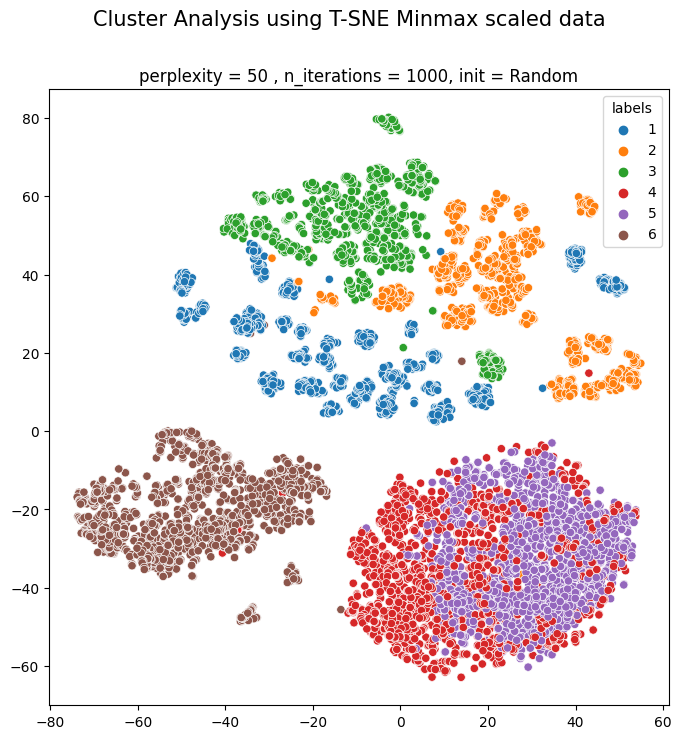

In [198]:
#MinMax Scaling
tsne_mm = TSNE(n_components= 2,init="random",
                    random_state=0,perplexity= 50.0,
                    learning_rate="auto",n_iter= 1000)
y_pred_mm = tsne_mm.fit_transform(X_train_mm)
plt.figure(figsize = (8,8))
sns.scatterplot(x = y_pred_mm[:,0], y = y_pred_mm[:,1],
                hue = y_train['labels'][list(pd.DataFrame(X_train_mm).index)], 
                palette = sns.color_palette(), legend = 'full')
plt.suptitle('Cluster Analysis using T-SNE Minmax scaled data', fontsize=15)
plt.title('perplexity = 50 , n_iterations = 1000, init = Random')
plt.show()

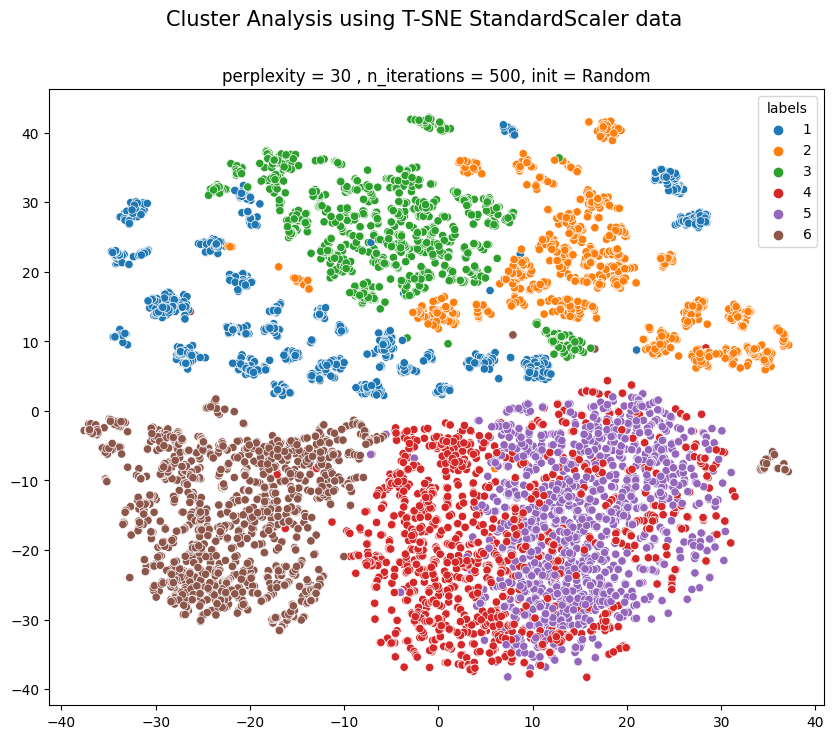

In [199]:
#StandardScaler Scaling
tsne_scl = TSNE(n_components= 2,init="random",
                    random_state=0,perplexity= 30.0,
                    learning_rate="auto",n_iter= 500)
y_pred_scl = tsne_scl.fit_transform(X_train_scl)
plt.figure(figsize = (10,8))
sns.scatterplot(x = y_pred_scl[:,0], y = y_pred_scl[:,1],
                hue = y_train['labels'][list(pd.DataFrame(X_train_scl).index)], 
                palette = sns.color_palette(), legend = 'full')
plt.suptitle('Cluster Analysis using T-SNE StandardScaler data', fontsize=15)
plt.title('perplexity = 30 , n_iterations = 500, init = Random')
plt.show()

In [ ]:
tsne_scl = TSNE(n_components= 2,init="random",
                    random_state=0,perplexity= 30.0,
                    learning_rate="auto",n_iter= 500)
y_pred_scl = tsne_scl.fit_transform(X_train_scl)
plt.figure(figsize = (10,8))
sns.scatterplot(x = y_pred_scl[:,0], y = y_pred_scl[:,1],
                hue = y_train['labels'][list(pd.DataFrame(X_train_scl).index)], 
                palette = sns.color_palette(), legend = 'full')
plt.suptitle('Cluster Analysis using T-SNE StandardScaler data', fontsize=15)
plt.title('perplexity = 30 , n_iterations = 500, init = Random')
plt.show()

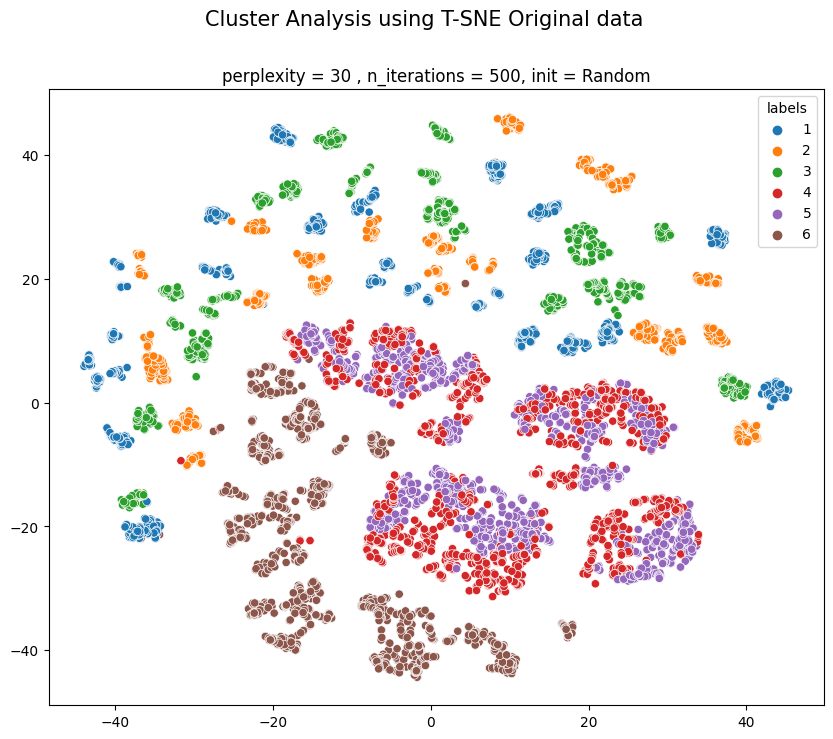

In [200]:
#Original data
tsne_org = TSNE(n_components= 2,init="random",
                    random_state=0,perplexity= 30.0,
                    learning_rate="auto",n_iter= 500)
y_pred_org = tsne_org.fit_transform(X_train)
plt.figure(figsize = (10,8))
sns.scatterplot(x = y_pred_org[:,0], y = y_pred_org[:,1],
                hue = y_train['labels'][list(pd.DataFrame(X_train).index)], 
                palette = sns.color_palette(), legend = 'full')
plt.suptitle('Cluster Analysis using T-SNE Original data', fontsize=15)
plt.title('perplexity = 30 , n_iterations = 500, init = Random')
plt.show()

### KMeans Clustering

In [247]:
result_df_train = pd.DataFrame()
result_df_train['y_train'] = y_train.labels
result_df_train['Activity'] = result_df_train['y_train'].map({1:'WALKING',
                                                             2:'WALKING_UPSTAIRS',
                                                             3:'WALKING_DOWNSTAIRS',
                                                             4:'SITTING',
                                                             5:'STANDING',
                                                             6:'LAYING'})
result_df_test = pd.DataFrame()
result_df_test['y_test'] = y_test.labels
result_df_test['Activity'] = result_df_test['y_test'].map({1:'WALKING',
                                                             2:'WALKING_UPSTAIRS',
                                                             3:'WALKING_DOWNSTAIRS',
                                                             4:'SITTING',
                                                             5:'STANDING',
                                                             6:'LAYING'})


def kmeans(X, X_trn, X_tst, label):
    k_means = KMeans(n_clusters = 6, random_state = 0).fit(X)
    result_df_train[label] = k_means.predict(X_trn)
    result_df_test[label] = k_means.predict(X_tst)
    
kmeans(X_train, X_train, X_test, 'y_pred')
kmeans(X_train_scl, X_train_scl, X_test_scl, 'y_pred_scl')
kmeans(X_train_mm, X_train_mm, X_test_mm, 'y_pred_mm')

In [252]:
def kmeans(X_trn, X_tst, label):
    k_means = KMeans(n_clusters = 6, random_state = 0)
    result_df_train[label] = k_means.fit_predict(X_trn)
    result_df_test[label] = k_means.fit_predict(X_tst)

kmeans(X_train_pca, X_test_scl_pca, 'y_pred_pca')
kmeans(X_train_scl_pca, X_test_scl_pca, 'y_pred_scl_pca')
kmeans(X_train_mm_pca, X_test_mm_pca, 'y_pred_mm_pca')

In [258]:
homo = []
comp = []
v_msr = []

def metrics_score(data, X, y, y_pred):
    print(f"Scores of on predicted {data} labels - KMeans:")
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_pred))
    homo.append(metrics.homogeneity_score(y, y_pred))
    print("Completeness: %0.3f" % metrics.completeness_score(y, y_pred))
    comp.append(metrics.completeness_score(y, y_pred))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, y_pred))
    v_msr.append(metrics.v_measure_score(y, y_pred))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, y_pred))
    print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y, y_pred))
    print("silhouette score:", metrics.silhouette_score(X, y_pred))
    print()
    
metrics_score('X_train', X_train, result_df_train['y_train'], result_df_train['y_pred'])
metrics_score('X_train_scl', X_train_scl, result_df_train['y_train'], result_df_train['y_pred_scl'])
metrics_score('X_train_mm', X_train_mm, result_df_train['y_train'], result_df_train['y_pred_mm'])
print("Prediction of test data using model trained on train data\n")
metrics_score('X_test', X_test, result_df_test['y_test'], result_df_test['y_pred'])
metrics_score('X_test_scl', X_test_scl, result_df_test['y_test'], result_df_test['y_pred_scl'])
metrics_score('X_test_mm', X_test_mm, result_df_test['y_test'], result_df_test['y_pred_mm'])
print("Prediction of train and test data using model trained on pca data")
metrics_score('X_train_pca', X_train_pca, result_df_train['y_train'], result_df_train['y_pred_pca'])
metrics_score('X_train_scl_pca', X_train_scl_pca, result_df_train['y_train'], result_df_train['y_pred_scl_pca'])
metrics_score('X_train_mm_pca', X_train_mm_pca, result_df_train['y_train'], result_df_train['y_pred_mm_pca'])
metrics_score('X_test_pca', X_test_pca, result_df_test['y_test'], result_df_test['y_pred_pca'])
metrics_score('X_test_scl_pca', X_test_scl_pca, result_df_test['y_test'], result_df_test['y_pred_scl_pca'])
metrics_score('X_test_mm_pca', X_test_mm_pca, result_df_test['y_test'], result_df_test['y_pred_mm_pca'])


Scores of on predicted X_train labels - KMeans:
Homogeneity: 0.380
Completeness: 0.380
V-measure: 0.380
Adjusted Rand Index: 0.198
Adjusted Mutual Information: 0.379
silhouette score: 0.3284691456591123

Scores of on predicted X_train_scl labels - KMeans:
Homogeneity: 0.540
Completeness: 0.576
V-measure: 0.557
Adjusted Rand Index: 0.419
Adjusted Mutual Information: 0.557
silhouette score: 0.10813408436569989

Scores of on predicted X_train_mm labels - KMeans:
Homogeneity: 0.571
Completeness: 0.597
V-measure: 0.584
Adjusted Rand Index: 0.455
Adjusted Mutual Information: 0.583
silhouette score: 0.14026198961261732

Prediction of test data using model trained on train data

Scores of on predicted X_test labels - KMeans:
Homogeneity: 0.382
Completeness: 0.407
V-measure: 0.394
Adjusted Rand Index: 0.220
Adjusted Mutual Information: 0.393
silhouette score: 0.21377179281341527

Scores of on predicted X_test_scl labels - KMeans:
Homogeneity: 0.558
Completeness: 0.600
V-measure: 0.578
Adjusted 

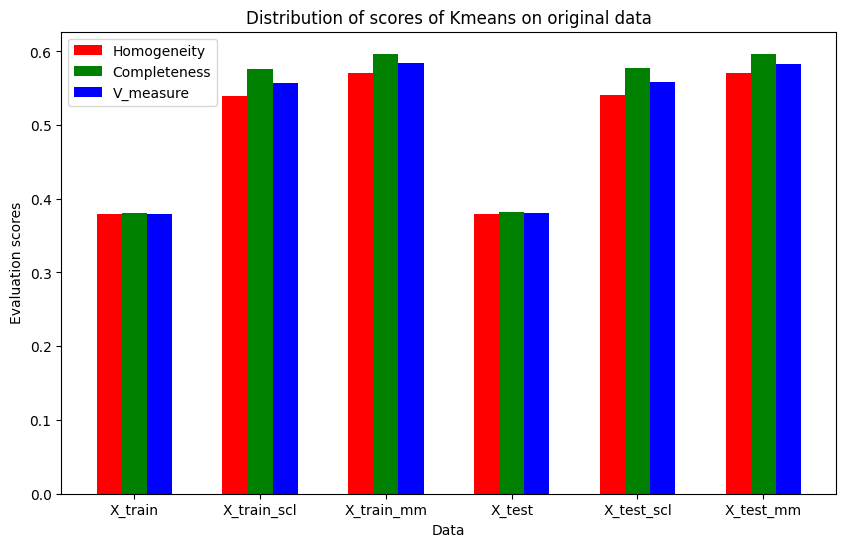

In [255]:
plt.figure(figsize = (10,6))
N = 6
ind = np.arange(N) 
width = 0.2
bar1 = plt.bar(ind, homo[:6], width, color = 'r')
bar2 = plt.bar(ind+width, comp[:6], width, color='g')
bar3 = plt.bar(ind+width*2, v_msr[:6], width, color = 'b')
plt.xlabel("Data")
plt.ylabel("Evaluation scores")
plt.title("Distribution of scores of Kmeans on original data")
plt.xticks(ind+width,['X_train', 'X_train_scl', 'X_train_mm', 'X_test', 'X_test_scl', 'X_test_mm'])
plt.legend((bar1, bar2, bar3), ('Homogeneity', 'Completeness', 'V_measure') )
plt.show()

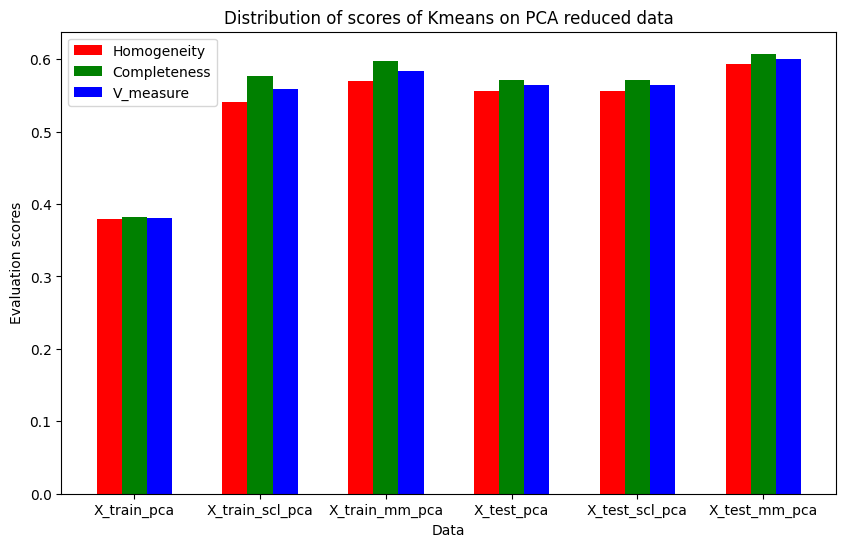

In [259]:
plt.figure(figsize = (10,6))
N = 6
ind = np.arange(N) 
width = 0.2
bar1 = plt.bar(ind, homo[6:], width, color = 'r')
bar2 = plt.bar(ind+width, comp[6:], width, color='g')
bar3 = plt.bar(ind+width*2, v_msr[6:], width, color = 'b')
plt.xlabel("Data")
plt.ylabel("Evaluation scores")
plt.title("Distribution of scores of Kmeans on PCA reduced data")
plt.xticks(ind+width,['X_train_pca', 'X_train_scl_pca', 'X_train_mm_pca', 'X_test_pca', 'X_test_scl_pca', 'X_test_mm_pca'])
plt.legend((bar1, bar2, bar3), ('Homogeneity', 'Completeness', 'V_measure') )
plt.show()

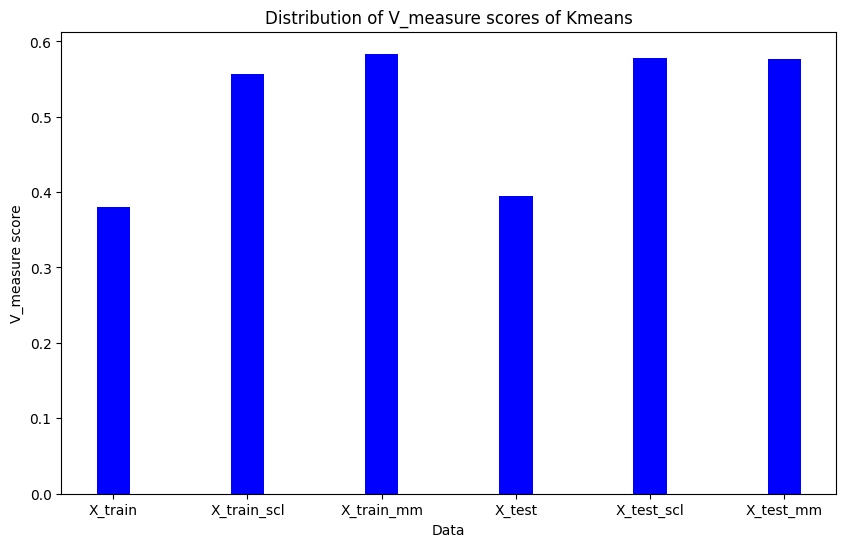

In [263]:
plt.figure(figsize = (10,6))
N = 6
ind = np.arange(N) 
width = 0.25
bar1 = plt.bar(ind, v_msr[:6], width, color = 'b')
plt.xlabel("Data")
plt.ylabel("V_measure score")
plt.title("Distribution of V_measure scores of Kmeans")
plt.xticks(ind,['X_train', 'X_train_scl', 'X_train_mm', 'X_test', 'X_test_scl', 'X_test_mm'])
plt.show()

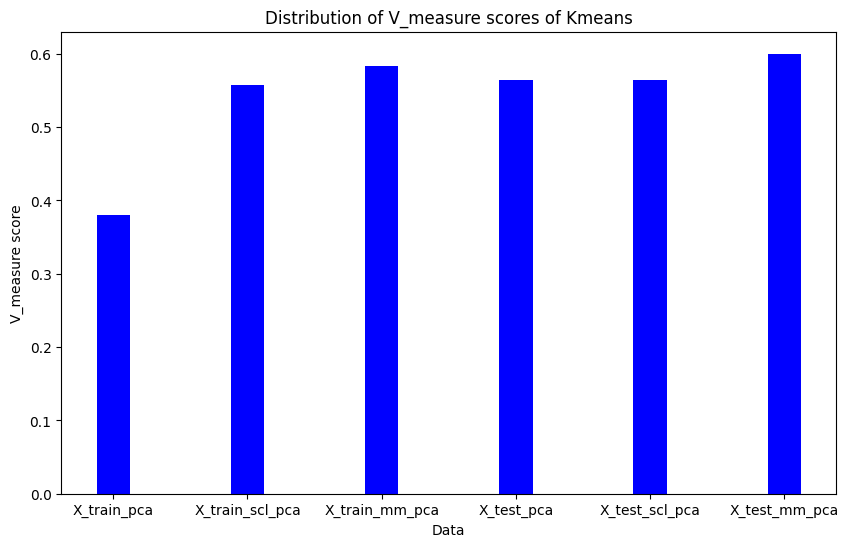

In [264]:
plt.figure(figsize = (10,6))
N = 6
ind = np.arange(N) 
width = 0.25
bar1 = plt.bar(ind, v_msr[6:], width, color = 'b')
plt.xlabel("Data")
plt.ylabel("V_measure score")
plt.title("Distribution of V_measure scores of Kmeans")
plt.xticks(ind,['X_train_pca', 'X_train_scl_pca', 'X_train_mm_pca',  'X_test_pca', 'X_test_scl_pca', 'X_test_mm_pca'])
plt.show()

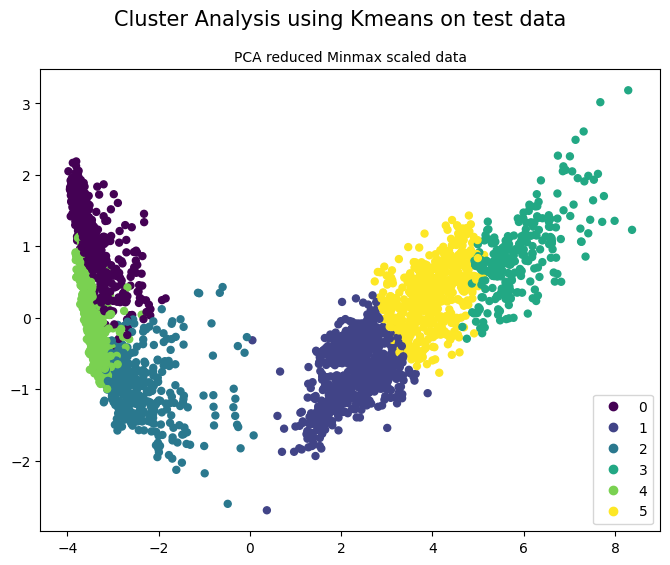

In [268]:
plt.figure(figsize=(8,6))
scatter4 = plt.scatter(X_test_mm_pca[:, 0], X_test_mm_pca[:, 1], c = result_df_test['y_pred_mm_pca'], s = 25, cmap='viridis')
plt.legend(handles= scatter4.legend_elements()[0], 
           labels= scatter4.legend_elements()[1])
plt.title('PCA reduced Minmax scaled data', fontsize=10)
plt.suptitle('Cluster Analysis using Kmeans on test data', fontsize=15)
plt.show()

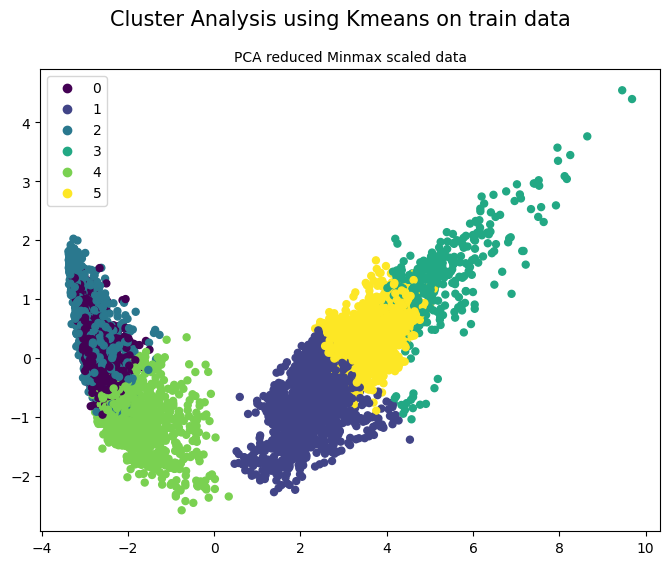

In [269]:
plt.figure(figsize=(8,6))
scatter4 = plt.scatter(X_train_mm_pca[:, 0], X_train_mm_pca[:, 1], c = result_df_train['y_pred_mm_pca'], s = 25, cmap='viridis')
plt.legend(handles= scatter4.legend_elements()[0], 
           labels= scatter4.legend_elements()[1])
plt.title('PCA reduced Minmax scaled data', fontsize=10)
plt.suptitle('Cluster Analysis using Kmeans on train data', fontsize=15)
plt.show()

### Gaussian Mixture Models

In [273]:
gmm_df_train = pd.DataFrame()
gmm_df_train['y_train'] = y_train.labels
gmm_df_train['Activity'] = gmm_df_train['y_train'].map({1:'WALKING',
                                                         2:'WALKING_UPSTAIRS',
                                                         3:'WALKING_DOWNSTAIRS',
                                                         4:'SITTING',
                                                         5:'STANDING',
                                                         6:'LAYING'})
gmm_df_test = pd.DataFrame()
gmm_df_test['y_test'] = y_test.labels
gmm_df_test['Activity'] = gmm_df_test['y_test'].map({1:'WALKING',
                                                             2:'WALKING_UPSTAIRS',
                                                             3:'WALKING_DOWNSTAIRS',
                                                             4:'SITTING',
                                                             5:'STANDING',
                                                             6:'LAYING'})

In [274]:
gmm = GaussianMixture(n_components = 6, n_init = 25,
                      covariance_type = 'tied',
                      random_state = 0).fit(X_train)
y_pred_gmm = gmm.predict(X_train)
print(gmm.bic(X_train))

-18392448.687040094


In [330]:
gmm_pca = GaussianMixture(n_components = 6, n_init = 25,
                      covariance_type = 'tied',
                      random_state = 0).fit(X_train_pca)
y_pred_gmm_pca = gmm_pca.predict(X_train_pca)

In [285]:
gmm_scl_pca = GaussianMixture(n_components = 6, n_init = 25,
                covariance_type = 'full',
                random_state = 0).fit(X_train_scl_pca)
y_pred_scl_pca_gmm_full = gmm_scl_pca.predict(X_train_scl_pca)
print(gmm.bic(X_train_scl_pca))

2462051.7302827453


In [286]:
gmm_scl = GaussianMixture(n_components = 6, n_init = 25,
                covariance_type = 'tied',
                random_state = 0).fit(X_train_scl_pca)
y_pred_scl_pca_gmm_tied = gmm_scl.predict(X_train_scl_pca)
print(gmm.bic(X_train_scl_pca))

2462051.7302827453


In [283]:
gmm_mm_pca = GaussianMixture(n_components = 6, n_init = 25,
                covariance_type = 'full',
                random_state = 0).fit(X_train_mm_pca)
y_pred_mm_pca_gmm_full = gmm_mm_pca.predict(X_train_mm_pca)
print(gmm_mm_pca.bic(X_train_mm_pca))

-391827.78861440695


In [284]:
gmm_mm = GaussianMixture(n_components = 6, n_init = 25,
                covariance_type = 'tied',
                random_state = 0).fit(X_train_mm_pca)
y_pred_mm_pca_gmm_tied = gmm_mm.predict(X_train_mm_pca)
print(gmm_mm.bic(X_train_mm_pca))

-159508.49917254123


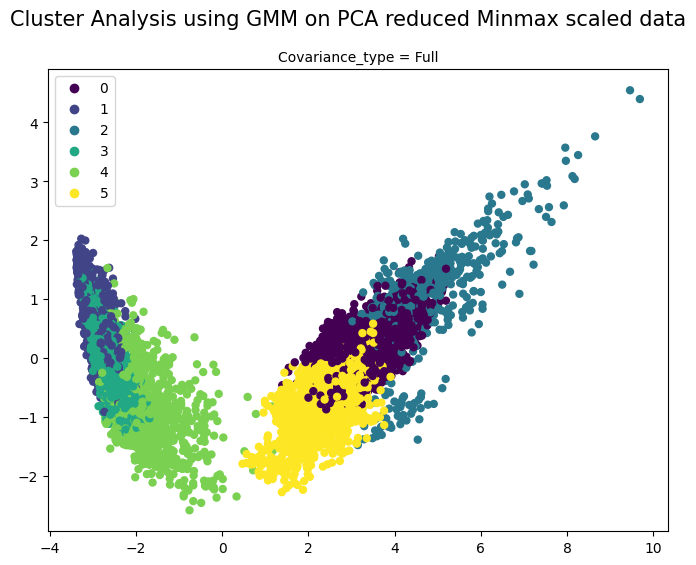

In [288]:
plt.figure(figsize=(8,6))
scatter4 = plt.scatter(X_train_mm_pca[:, 0], X_train_mm_pca[:, 1], c = y_pred_mm_pca_gmm_full, s = 25, cmap='viridis')
plt.legend(handles=scatter4.legend_elements()[0], 
           labels= scatter4.legend_elements()[1])
plt.title('Covariance_type = Full', fontsize=10)
plt.suptitle('Cluster Analysis using GMM on PCA reduced Minmax scaled data', fontsize=15)
plt.show()

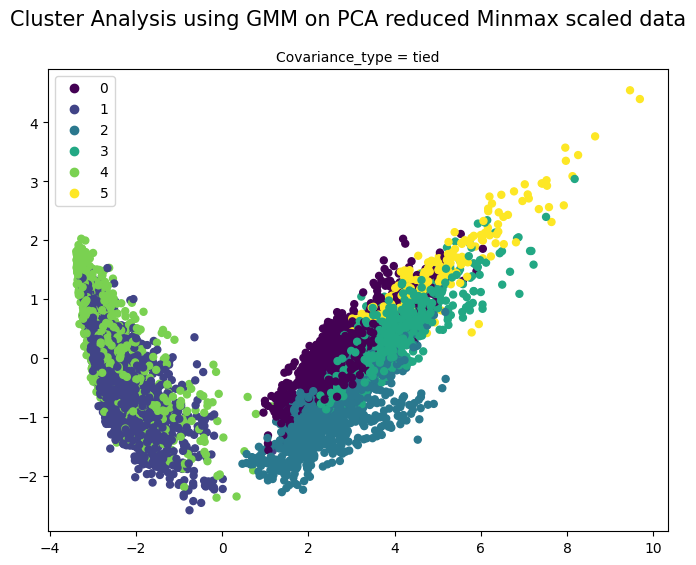

In [290]:
plt.figure(figsize=(8,6))
scatter4 = plt.scatter(X_train_mm_pca[:, 0], X_train_mm_pca[:, 1], c = y_pred_mm_pca_gmm_tied, s = 25, cmap='viridis')
plt.legend(handles=scatter4.legend_elements()[0], 
           labels= scatter4.legend_elements()[1])
plt.title('Covariance_type = tied', fontsize=10)
plt.suptitle('Cluster Analysis using GMM on PCA reduced Minmax scaled data', fontsize=15)
plt.show()

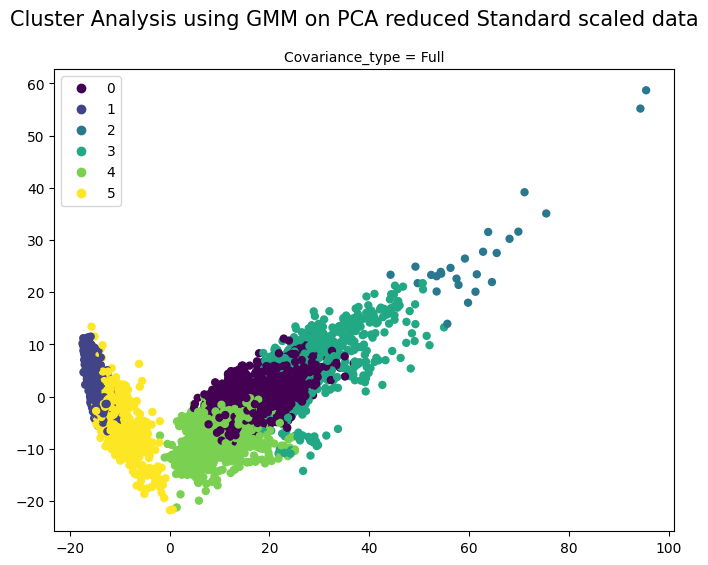

In [291]:
plt.figure(figsize=(8,6))
scatter4 = plt.scatter(X_train_scl_pca[:, 0], X_train_scl_pca[:, 1], c = y_pred_scl_pca_gmm_full, s = 25, cmap='viridis')
plt.legend(handles=scatter4.legend_elements()[0], 
           labels= scatter4.legend_elements()[1])
plt.title('Covariance_type = Full', fontsize=10)
plt.suptitle('Cluster Analysis using GMM on PCA reduced Standard scaled data', fontsize=15)
plt.show()

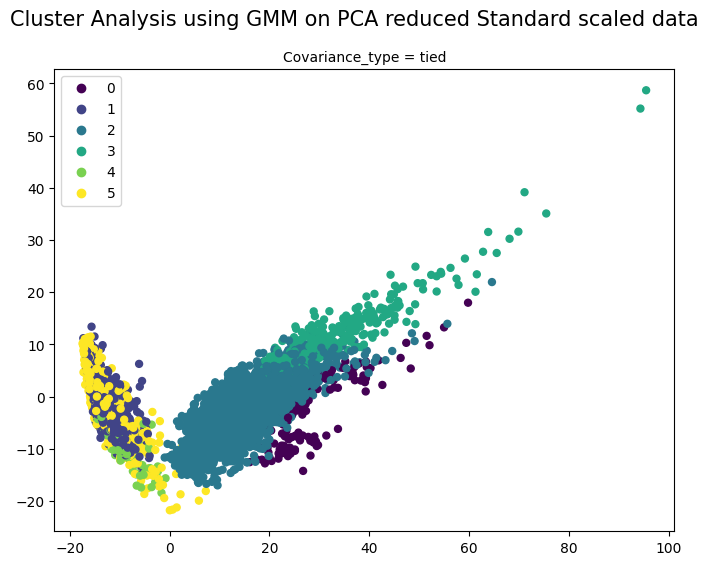

In [292]:
plt.figure(figsize=(8,6))
scatter4 = plt.scatter(X_train_scl_pca[:, 0], X_train_scl_pca[:, 1], c = y_pred_scl_pca_gmm_tied, s = 25, cmap='viridis')
plt.legend(handles=scatter4.legend_elements()[0], 
           labels= scatter4.legend_elements()[1])
plt.title('Covariance_type = tied', fontsize=10)
plt.suptitle('Cluster Analysis using GMM on PCA reduced Standard scaled data', fontsize=15)
plt.show()

In [331]:
gmm_df_train['y_pred_gmm'] = y_pred_gmm
gmm_df_train['y_pred_gmm_pca'] = y_pred_gmm_pca
gmm_df_train['y_pred_scl_pca_gmm_full'] = y_pred_scl_pca_gmm_full
gmm_df_train['y_pred_scl_pca_gmm_tied'] = y_pred_scl_pca_gmm_tied
gmm_df_train['y_pred_mm_pca_gmm_full'] = y_pred_mm_pca_gmm_full
gmm_df_train['y_pred_mm_pca_gmm_tied'] = y_pred_mm_pca_gmm_tied

homo_gmm = []
comp_gmm = []
vmsr_gmm = []

def metrics_score_gmm(data, X, y, y_pred):
    print(f"Scores of on predicted {data} labels - GMM:")
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_pred))
    homo_gmm.append(metrics.homogeneity_score(y, y_pred))
    print("Completeness: %0.3f" % metrics.completeness_score(y, y_pred))
    comp_gmm.append(metrics.completeness_score(y, y_pred))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, y_pred))
    vmsr_gmm.append(metrics.v_measure_score(y, y_pred))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, y_pred))
    print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y, y_pred))
    print("silhouette score:", metrics.silhouette_score(X, y_pred))
    print()
    
metrics_score_gmm('X_train', X_train, gmm_df_train['y_train'], gmm_df_train['y_pred_gmm'])
metrics_score_gmm('X_train_pca', X_train_pca, gmm_df_train['y_train'], gmm_df_train['y_pred_gmm_pca'])
metrics_score_gmm('y_pred_scl_pca_gmm_full', X_train_scl_pca,
                  gmm_df_train['y_train'], gmm_df_train['y_pred_scl_pca_gmm_full'])
metrics_score_gmm('y_pred_scl_pca_gmm_tied', X_train_mm_pca, 
                  gmm_df_train['y_train'], gmm_df_train['y_pred_scl_pca_gmm_tied'])
metrics_score_gmm('y_pred_mm_pca_gmm_full', X_train_scl_pca,
                  gmm_df_train['y_train'], gmm_df_train['y_pred_mm_pca_gmm_full'])
metrics_score_gmm('y_pred_mm_pca_gmm_tied', X_train_mm_pca, 
                  gmm_df_train['y_train'], gmm_df_train['y_pred_mm_pca_gmm_tied'])

Scores of on predicted X_train labels - GMM:
Homogeneity: 0.381
Completeness: 0.387
V-measure: 0.384
Adjusted Rand Index: 0.205
Adjusted Mutual Information: 0.383
silhouette score: 0.3138356843059865

Scores of on predicted X_train_pca labels - GMM:
Homogeneity: 0.583
Completeness: 0.631
V-measure: 0.606
Adjusted Rand Index: 0.455
Adjusted Mutual Information: 0.606
silhouette score: 0.02055970580221473

Scores of on predicted y_pred_scl_pca_gmm_full labels - GMM:
Homogeneity: 0.426
Completeness: 0.515
V-measure: 0.466
Adjusted Rand Index: 0.300
Adjusted Mutual Information: 0.466
silhouette score: 0.13631195267772356

Scores of on predicted y_pred_scl_pca_gmm_tied labels - GMM:
Homogeneity: 0.590
Completeness: 0.790
V-measure: 0.676
Adjusted Rand Index: 0.506
Adjusted Mutual Information: 0.675
silhouette score: 0.2044450949214382

Scores of on predicted y_pred_mm_pca_gmm_full labels - GMM:
Homogeneity: 0.571
Completeness: 0.588
V-measure: 0.579
Adjusted Rand Index: 0.446
Adjusted Mutual

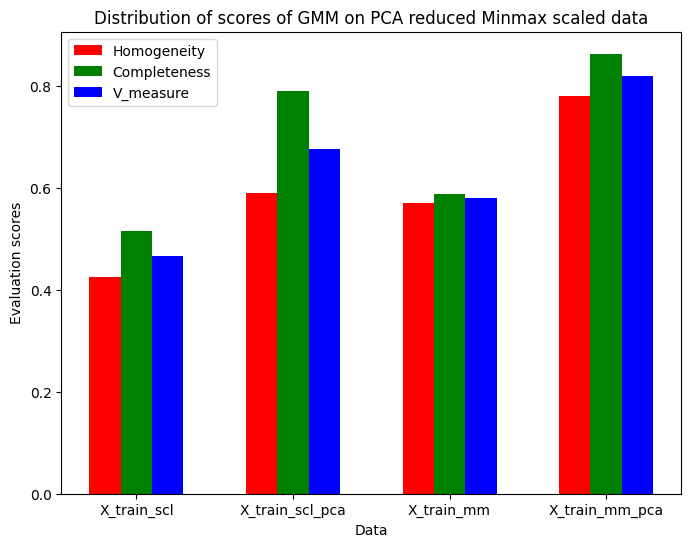

In [296]:
plt.figure(figsize = (8,6))
N = 4
ind = np.arange(N) 
width = 0.2
bar1 = plt.bar(ind, homo_gmm[1:], width, color = 'r')
bar2 = plt.bar(ind+width, comp_gmm[1:], width, color='g')
bar3 = plt.bar(ind+width*2, vmsr_gmm[1:], width, color = 'b')
plt.xlabel("Data")
plt.ylabel("Evaluation scores")
plt.title("Distribution of scores of GMM on PCA reduced Minmax scaled data")
plt.xticks(ind+width,['X_train_scl', 'X_train_scl_pca', 'X_train_mm', 'X_train_mm_pca'])
plt.legend((bar1, bar2, bar3), ('Homogeneity', 'Completeness', 'V_measure') )
plt.show()

### Agglomerative Clustering

- Compare best data using V-mesaure metric

In [299]:
# V_measure score
def agg_cluster_vmsr(X):
    affinity = ['manhattan', 'euclidean', 'cosine']
    linkage  = ['single','complete', 'average']
    vmsr_max = 0
    best_aff = ''
    best_linkage = ''
    for i, aff in enumerate(affinity):
        for j, link in enumerate(linkage):
            agg = AgglomerativeClustering(n_clusters=6, affinity= aff, linkage= link) 
            y_pred = agg.fit_predict(X)
            v_msr = metrics.v_measure_score(y_train['labels'], y_pred)
            if v_msr > vmsr_max:
                vmsr_max = v_msr
                best_aff = affinity[i]
                best_linkage = linkage[j]
    print("best affinity:", best_aff)
    print("best linkage:", best_linkage)
    print("V_measure score:", vmsr_max)
    
print("Dataset: X_train - Original data")
agg_cluster_vmsr(X_train)
print()
print("Dataset: X_train_scl - Scaled Original data")
agg_cluster_vmsr(X_train_scl)
print()
print("Dataset: X_train_pca - PCA reduced Original data")
agg_cluster_vmsr(X_train_pca)
print()
print("Dataset: X_train_scl_pca - PCA reduced scaled data")
agg_cluster_vmsr(X_train_scl_pca)
print()
print("Dataset: X_train_mm - Minmax scaled data")
agg_cluster_vmsr(X_train_mm)
print()
print("Dataset: X_train_mm_pca - PCA reduced Minmax scaled data")
agg_cluster_vmsr(X_train_mm_pca)
print()

Dataset: X_train - Original data
best affinity: manhattan
best linkage: average
V_measure score: 0.5505982769568483

Dataset: X_train_scl - Scaled Original data
best affinity: cosine
best linkage: average
V_measure score: 0.5496838963922578

Dataset: X_train_pca - PCA reduced Original data
best affinity: cosine
best linkage: average
V_measure score: 0.4314323197830301

Dataset: X_train_scl_pca - PCA reduced scaled data
best affinity: cosine
best linkage: average
V_measure score: 0.5333390104612666

Dataset: X_train_mm - Minmax scaled data
best affinity: cosine
best linkage: complete
V_measure score: 0.6240838082100844

Dataset: X_train_mm_pca - PCA reduced Minmax scaled data
best affinity: cosine
best linkage: complete
V_measure score: 0.6430664338625376



In [301]:
homo_agg = []
comp_agg = []
vmsr_agg = []

def best_agg(X, affinity, linkage, data_name):
    agg = AgglomerativeClustering(n_clusters = 6, affinity= affinity, linkage= linkage)
    y_pred = agg.fit_predict(X)
    print(f"Scores of {data_name} - Agglomerative:")
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train['labels'], y_pred))
    homo_agg.append(metrics.homogeneity_score(y_train['labels'], y_pred))
    print("Completeness: %0.3f" % metrics.completeness_score(y_train['labels'], y_pred))
    comp_agg.append(metrics.completeness_score(y_train['labels'], y_pred))
    print("V-measure: %0.3f" % metrics.v_measure_score(y_train['labels'], y_pred))
    vmsr_agg.append(metrics.v_measure_score(y_train['labels'], y_pred))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_train['labels'], y_pred))
    print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y_train['labels'], y_pred))
    print("silhouette score:", metrics.silhouette_score(X, y_pred))

best_agg(X_train, 'manhattan', 'average', 'X_train')
print()
best_agg(X_train_scl, 'cosine', 'average', 'X_train - Scaled data')
print()
best_agg(X_train_mm, 'cosine', 'complete', 'X_train - MM Scaled data')
print()
best_agg(X_train_pca, 'cosine', 'average', 'X_train - PCA reduced data')
print()
best_agg(X_train_scl_pca, 'cosine', 'average', 'X_train - PCA reduced Scaled data')
print()
best_agg(X_train_mm_pca, 'cosine', 'complete', 'X_train - PCA reduced MM Scaled data')

Scores of X_train - Agglomerative:
Homogeneity: 0.394
Completeness: 0.912
V-measure: 0.551
Adjusted Rand Index: 0.331
Adjusted Mutual Information: 0.550
silhouette score: 0.10231585270877473

Scores of X_train - Scaled data - Agglomerative:
Homogeneity: 0.385
Completeness: 0.959
V-measure: 0.550
Adjusted Rand Index: 0.330
Adjusted Mutual Information: 0.549
silhouette score: 0.1844373492874974

Scores of X_train - MM Scaled data - Agglomerative:
Homogeneity: 0.556
Completeness: 0.711
V-measure: 0.624
Adjusted Rand Index: 0.443
Adjusted Mutual Information: 0.624
silhouette score: 0.20077520878003266

Scores of X_train - PCA reduced data - Agglomerative:
Homogeneity: 0.384
Completeness: 0.492
V-measure: 0.431
Adjusted Rand Index: 0.248
Adjusted Mutual Information: 0.431
silhouette score: 0.2750730161286316

Scores of X_train - PCA reduced Scaled data - Agglomerative:
Homogeneity: 0.400
Completeness: 0.801
V-measure: 0.533
Adjusted Rand Index: 0.320
Adjusted Mutual Information: 0.533
silho

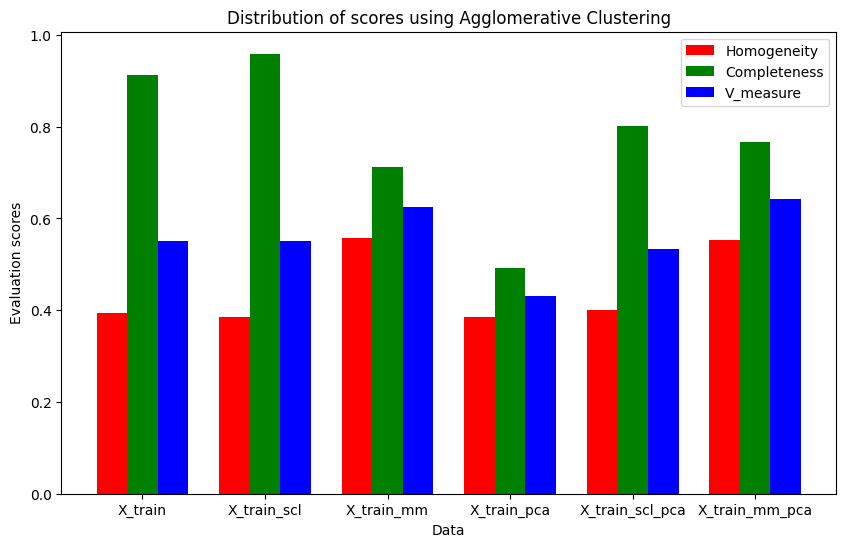

In [302]:
plt.figure(figsize = (10,6))
N = 6
ind = np.arange(N) 
width = 0.25
bar1 = plt.bar(ind, homo_agg, width, color = 'r')
bar2 = plt.bar(ind+width, comp_agg, width, color='g')
bar3 = plt.bar(ind+width*2, vmsr_agg, width, color = 'b')
plt.xlabel("Data")
plt.ylabel("Evaluation scores")
plt.title("Distribution of scores using Agglomerative Clustering")
plt.xticks(ind+width,['X_train', 'X_train_scl', 'X_train_mm', 'X_train_pca','X_train_scl_pca', 'X_train_mm_pca'])
plt.legend((bar1, bar2, bar3), ('Homogeneity', 'Completeness', 'V_measure') )
plt.show()

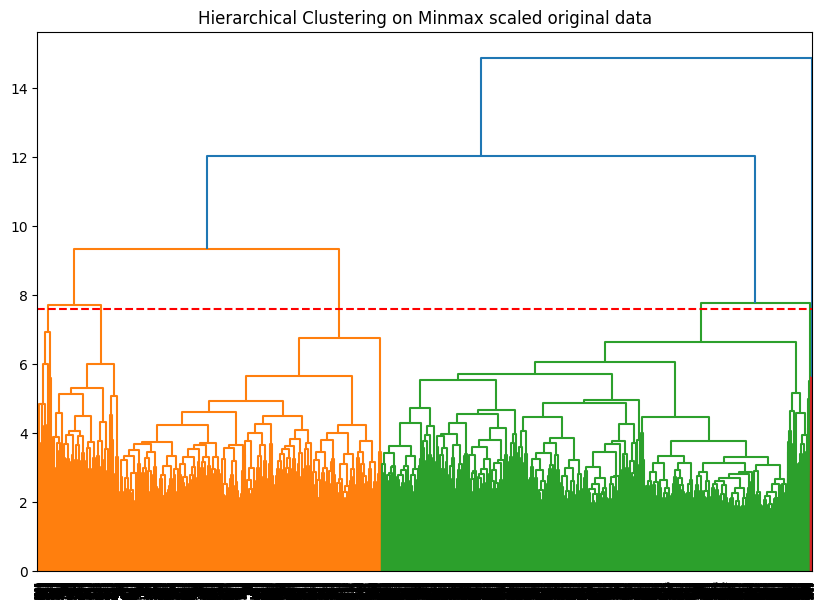

In [304]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 7))  
plt.title("Hierarchical Clustering on Minmax scaled original data")  
dendrogram(linkage(X_train_mm_pca, 'complete'),
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.axhline(y= 7.6, color='r', linestyle='--')
plt.xticks(rotation = 90)
plt.show()

### Spectral Clustering

In [306]:
spc_df_train = pd.DataFrame()
spc_df_train['y_train'] = y_train.labels
spc_df_train['Activity'] = spc_df_train['y_train'].map({1:'WALKING',
                                                             2:'WALKING_UPSTAIRS',
                                                             3:'WALKING_DOWNSTAIRS',
                                                             4:'SITTING',
                                                             5:'STANDING',
                                                             6:'LAYING'})
spc_df_test = pd.DataFrame()
spc_df_test['y_test'] = y_test.labels
spc_df_test['Activity'] = spc_df_test['y_test'].map({1:'WALKING',
                                                             2:'WALKING_UPSTAIRS',
                                                             3:'WALKING_DOWNSTAIRS',
                                                             4:'SITTING',
                                                             5:'STANDING',
                                                             6:'LAYING'})

In [308]:
# Calculating best neighbors on best V_measure scores on the dataset
def best_neigh(X, data_name):
    neigh = [10,30,50,80,100,300]
    vmsr_max = 0
    for n in neigh:
        spc = SpectralClustering(n_clusters = 6,
                                 affinity = 'nearest_neighbors',
                                 n_neighbors = n,
                                 assign_labels = 'discretize')
        y_spc = spc.fit_predict(X)
        v_msr = metrics.v_measure_score(y_train['labels'], y_spc)
        if round(v_msr,3) > vmsr_max:
            vmsr_max = round(v_msr,3)
            best_n = n
    print(f"Best set of neightbors for spectral clustering on {data_name}: ", best_n)
    
best_neigh(X_train, 'X_train')
print()
best_neigh(X_train_scl,'X_train - Scaled data')
print()
best_neigh(X_train_mm, 'X_train - MM Scaled data')
print()
best_neigh(X_train_pca,'X_train - PCA reduced data')
print()
best_neigh(X_train_scl_pca, 'X_train - PCA reduced Scaled data')
print()
best_neigh(X_train_mm_pca, 'X_train - PCA reduced MM Scaled data')

Best set of neightbors for spectral clustering on X_train:  30

Best set of neightbors for spectral clustering on X_train - Scaled data:  10

Best set of neightbors for spectral clustering on X_train - MM Scaled data:  10

Best set of neightbors for spectral clustering on X_train - PCA reduced data:  30

Best set of neightbors for spectral clustering on X_train - PCA reduced Scaled data:  10

Best set of neightbors for spectral clustering on X_train - PCA reduced MM Scaled data:  10


In [311]:
def best_spc(X_trn, y_name, neigh):
    spc = SpectralClustering(n_clusters = 6,
                                 affinity = 'nearest_neighbors',
                                 n_neighbors = neigh,
                                 assign_labels = 'discretize')
    spc_df_train[y_name] = spc.fit_predict(X_trn)
#     spc_df_test[y_name] = spc.predict(X_tst)
            
best_spc(X_train,'y_pred', 30)
best_spc(X_train_scl,'y_pred_scl', 10)
best_spc(X_train_mm,'y_pred_mm', 10)
best_spc(X_train_pca,'y_pred_pca', 30)
best_spc(X_train_scl_pca,'y_pred_scl_pca', 10)
best_spc(X_train_mm_pca,'y_pred_mm_pca', 10)

In [328]:
homo_spc = []
comp_spc = []
vmsr_spc = []

def metrics_spc(data, X, y, y_pred):
    print(f"Scores of on predicted {data} labels - Spectral:")
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_pred))
    homo_spc.append(metrics.homogeneity_score(y, y_pred))
    print("Completeness: %0.3f" % metrics.completeness_score(y, y_pred))
    comp_spc.append(metrics.completeness_score(y, y_pred))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, y_pred))
    vmsr_spc.append(metrics.v_measure_score(y, y_pred))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, y_pred))
    print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y, y_pred))
    print("silhouette score:", metrics.silhouette_score(X, y_pred))
    print()
    
    
metrics_spc('X_train', X_train, spc_df_train['y_train'], spc_df_train['y_pred'])
metrics_spc('X_train_scl', X_train_scl,
                  spc_df_train['y_train'], spc_df_train['y_pred_scl'])
metrics_spc('X_train_mm', X_train_mm, 
                  spc_df_train['y_train'], spc_df_train['y_pred_mm'])
metrics_spc('X_train_pca', X_train_pca,
                  spc_df_train['y_train'], spc_df_train['y_pred_pca'])
metrics_spc('X_train_scl_pca', X_train_scl_pca, 
                  spc_df_train['y_train'], spc_df_train['y_pred_scl_pca'])
metrics_spc('X_train_mm_pca', X_train_mm_pca, 
                  spc_df_train['y_train'], spc_df_train['y_pred_mm_pca'])

Scores of on predicted X_train labels - Spectral:
Homogeneity: 0.381
Completeness: 0.434
V-measure: 0.406
Adjusted Rand Index: 0.243
Adjusted Mutual Information: 0.405
silhouette score: 0.2662096949406844

Scores of on predicted X_train_scl labels - Spectral:
Homogeneity: 0.570
Completeness: 0.768
V-measure: 0.654
Adjusted Rand Index: 0.506
Adjusted Mutual Information: 0.654
silhouette score: 0.040518058882408114

Scores of on predicted X_train_mm labels - Spectral:
Homogeneity: 0.586
Completeness: 0.888
V-measure: 0.706
Adjusted Rand Index: 0.510
Adjusted Mutual Information: 0.706
silhouette score: 0.11287046921490444

Scores of on predicted X_train_pca labels - Spectral:
Homogeneity: 0.381
Completeness: 0.435
V-measure: 0.406
Adjusted Rand Index: 0.244
Adjusted Mutual Information: 0.406
silhouette score: 0.3052054816947846

Scores of on predicted X_train_scl_pca labels - Spectral:
Homogeneity: 0.572
Completeness: 0.746
V-measure: 0.648
Adjusted Rand Index: 0.505
Adjusted Mutual Infor

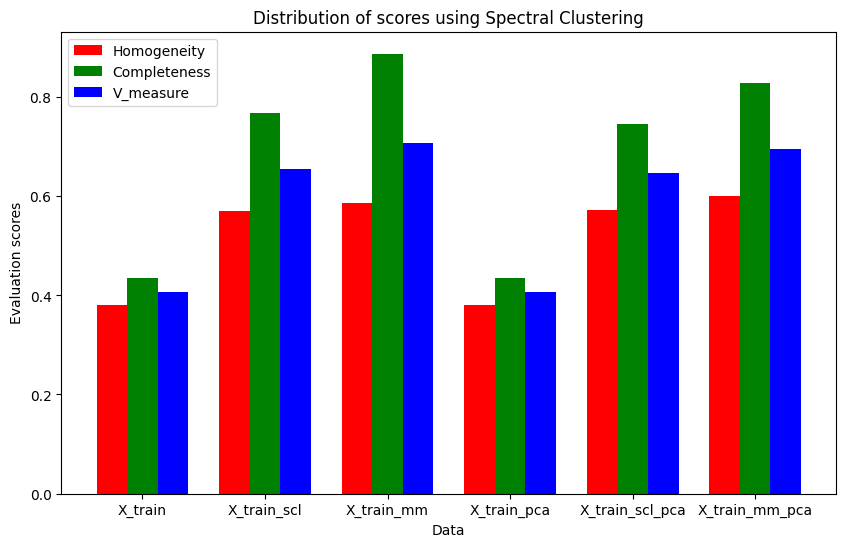

In [318]:
plt.figure(figsize = (10,6))
N = 6
ind = np.arange(N) 
width = 0.25
bar1 = plt.bar(ind, homo_spc, width, color = 'r')
bar2 = plt.bar(ind+width, comp_spc, width, color='g')
bar3 = plt.bar(ind+width*2, vmsr_spc, width, color = 'b')
plt.xlabel("Data")
plt.ylabel("Evaluation scores")
plt.title("Distribution of scores using Spectral Clustering")
plt.xticks(ind+width,['X_train', 'X_train_scl', 'X_train_mm', 'X_train_pca','X_train_scl_pca', 'X_train_mm_pca'])
plt.legend((bar1, bar2, bar3), ('Homogeneity', 'Completeness', 'V_measure') )
plt.show()

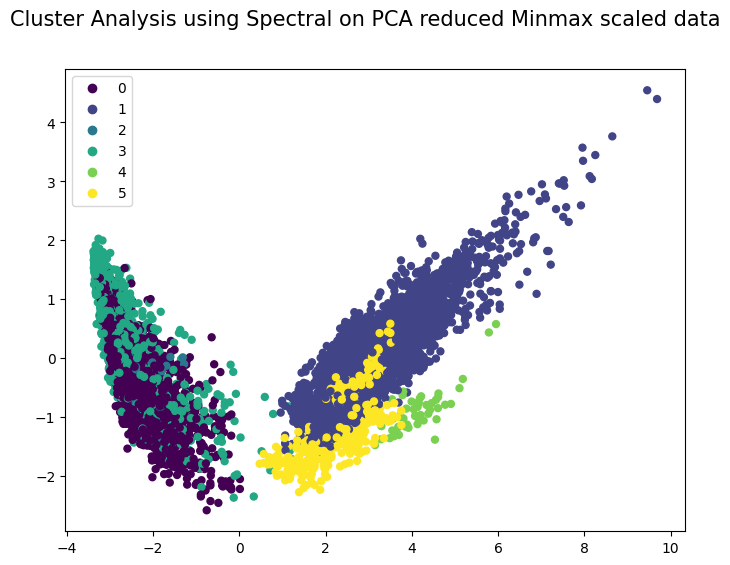

In [322]:
plt.figure(figsize=(8,6))
scatter4 = plt.scatter(X_train_mm_pca[:, 0], X_train_mm_pca[:, 1], c = spc_df_train['y_pred_mm_pca'], s = 25, cmap='viridis')
plt.legend(handles=scatter4.legend_elements()[0], 
           labels= scatter4.legend_elements()[1])
plt.suptitle('Cluster Analysis using Spectral on PCA reduced Minmax scaled data', fontsize=15)
plt.show()

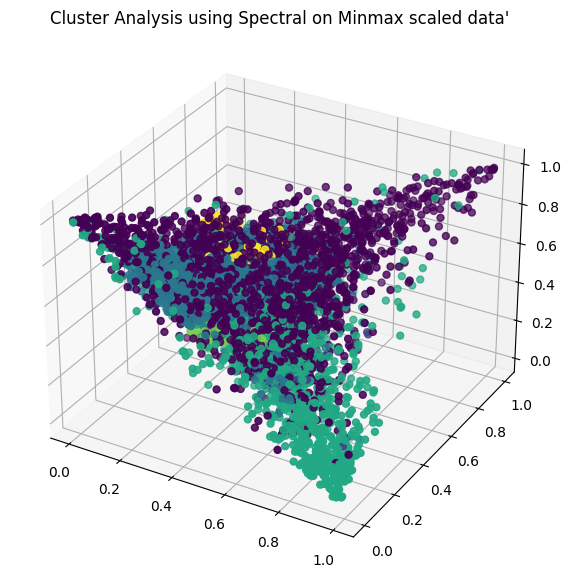

In [327]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X_train_mm[:,37], X_train_mm[:,38], X_train_mm[:,39], c = spc_df_train['y_pred_mm'], s = 25, cmap='viridis')
plt.title("Cluster Analysis using Spectral on Minmax scaled data'")
plt.show()

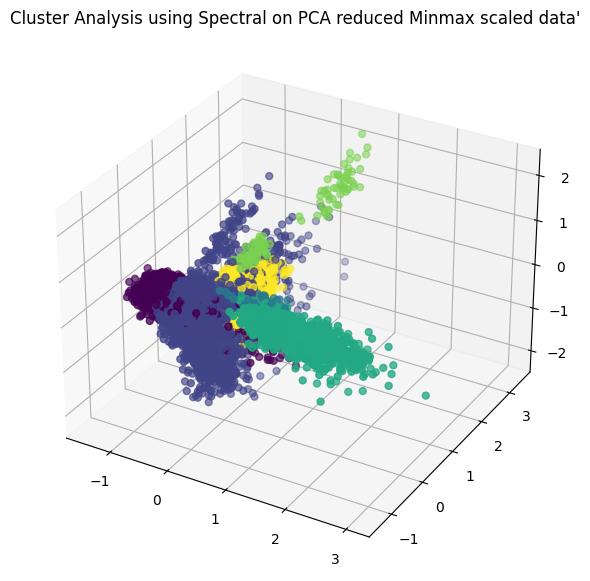

In [326]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X_train_mm_pca[:,2], X_train_mm_pca[:,3], X_train_mm_pca[:,4], 
             c = spc_df_train['y_pred_mm_pca'], s = 25, cmap='viridis')
plt.title("Cluster Analysis using Spectral on PCA reduced Minmax scaled data'")
plt.show()